### Урок 4. Визуальный анализ данных

### Условие 1: Задача 1
Постройте график<br>
Назовите график<br>
Сделайте именование оси x и оси y<br>
Сделайте выводы

### 1.1. Данные из прошлого дз

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

df = pd.read_csv('kc_house_data.csv', sep=',', encoding='latin-1')
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 1.2 Изучите стоимости недвижимости

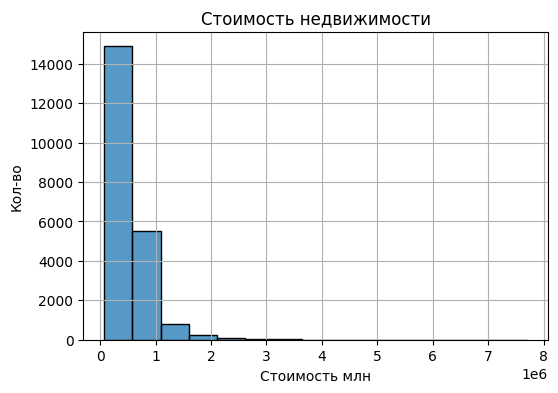

In [3]:
plt.figure(figsize=(6, 4))

sns.histplot(df['price'], bins=15)

plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость млн')
plt.ylabel('Кол-во')
plt.grid()


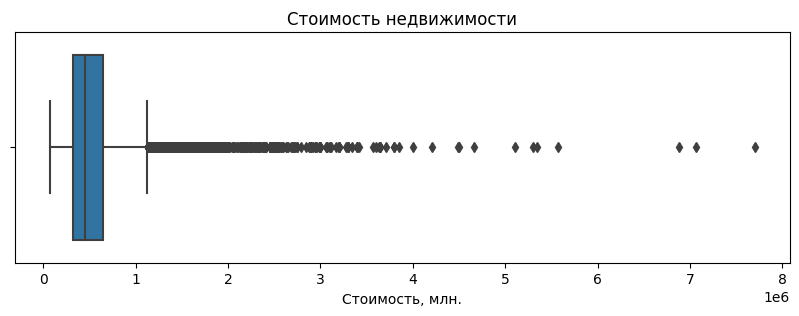

In [4]:
plt.figure(figsize=(10, 3))

sns.boxplot(x=df['price'])
plt.title("Стоимость недвижимости")
plt.xlabel("Стоимость, млн.");

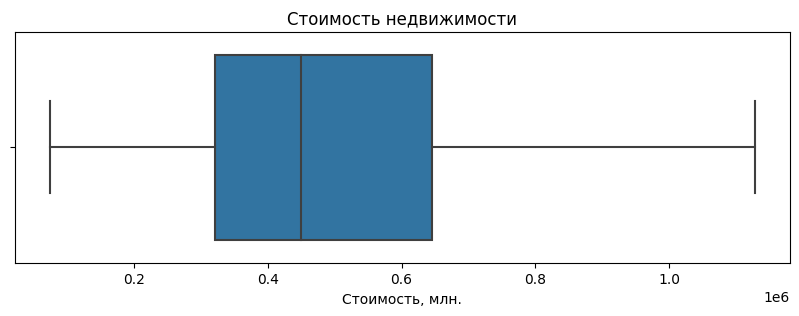

In [5]:
plt.figure(figsize=(10, 3))

sns.boxplot(x=df['price'], showfliers=False)
plt.title("Стоимость недвижимости")
plt.xlabel("Стоимость, млн.");

Видим из графиков, что __основная__ доля недвижимости находится в деопазоне от __0.3 - 0.65 млн.__, и в деопазоне примерно от __1.1 - 7.8 млн.__ находятся так называемые выбросы, которые занимают наименьшую долю из выборки недвижимости, но при этом являются более дорогой.<br>
Более дешевой недвижимости больше, чем дорогой. 

### 1.3 Изучите распределение квадратуры жилой

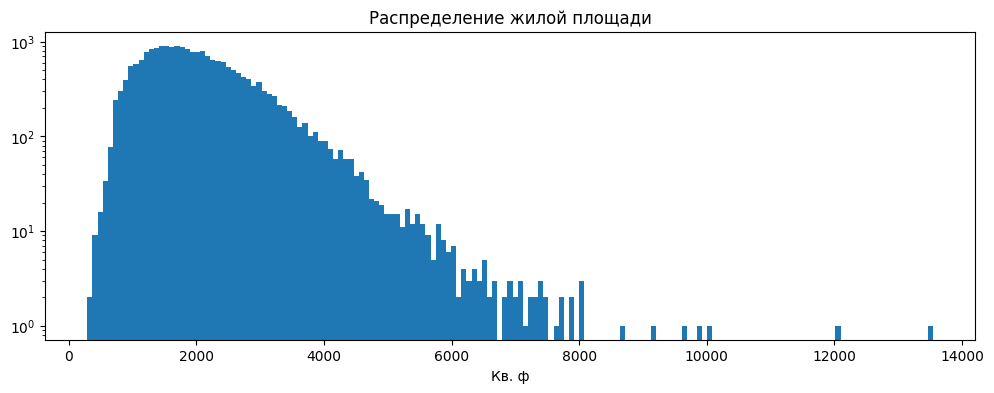

In [6]:
plt.figure(figsize=(12, 4))

plt.hist(df['sqft_living'], bins='auto', log=True)
plt.title("Распределение жилой площади")
plt.xlabel("Кв. ф");

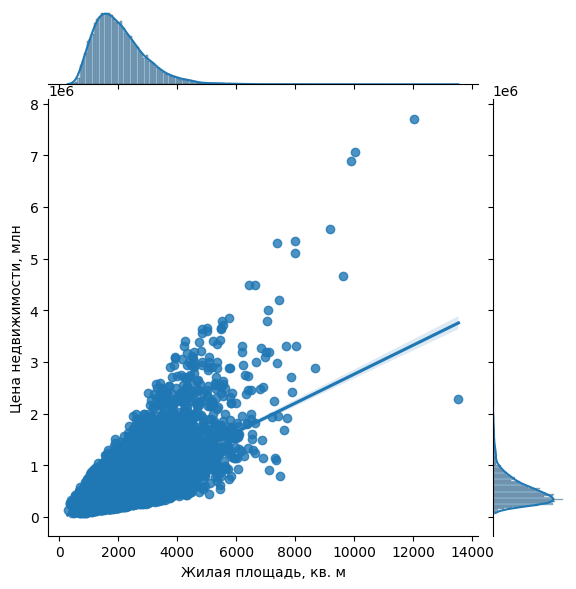

In [7]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg')

plt.xlabel("Жилая площадь, кв. м")
plt.ylabel("Цена недвижимости, млн");

Из графика видно, что есть прямая зависимость цены недвижимости и площади недвижимости.
Чем больше площадь недвижимости, тем выше ее цена. Разброс от оси говорит нам о том, что цена на недвижимость зависит еще от других факторов. 

### 2.1.4 Изучите распределение года постройки

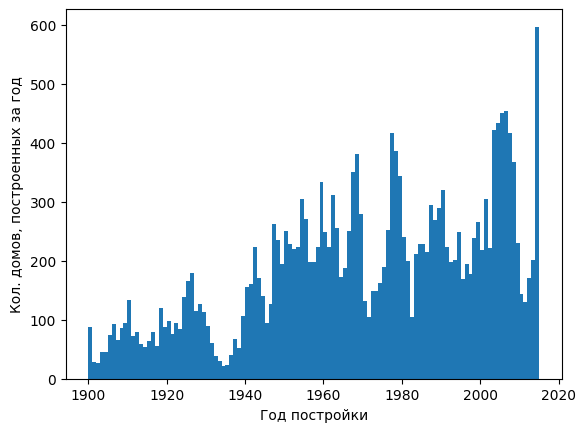

In [8]:
plt.hist(df['yr_built'],bins=range(df['yr_built'].min(), df['yr_built'].max() + 1))

plt.xlabel("Год постройки")
plt.ylabel("Кол. домов, построенных за год");

Из графика видно, что количество домов увеличивается, но вместе с тем существуют и спады строительства в определенные года.

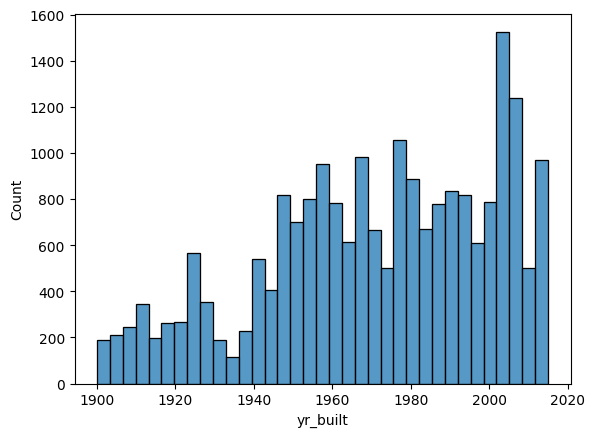

In [9]:
sns.histplot(df['yr_built']);

## Условие 2: 2 задача
### 2.1 Изучите распределение домов от наличия вида на набережную<br>Постройте график<br>Сделайте выводы 

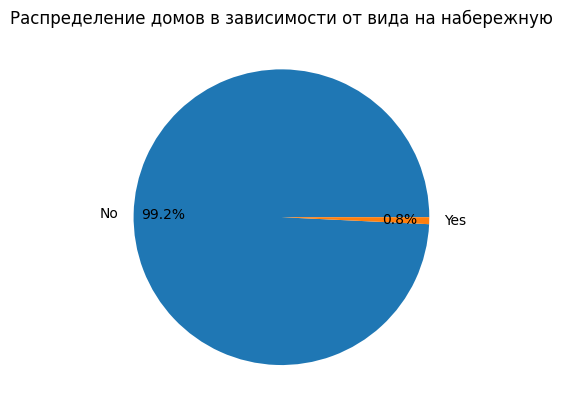

In [23]:
data = df['waterfront'].value_counts()
data.index = ["No", "Yes"]

plt.pie(data.values, labels=data.index, autopct='%1.1f%%', pctdistance=0.8)

plt.title("Распределение домов в зависимости от вида на набережную");

Из графика видим, что доля домов с видом на набережную составляет 0.8 % от общего числа недвижимости

### 2.2 Изучите распределение этажей домов

In [11]:
data = df['floors'].value_counts().reset_index()
data.head()

,index,floors
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161


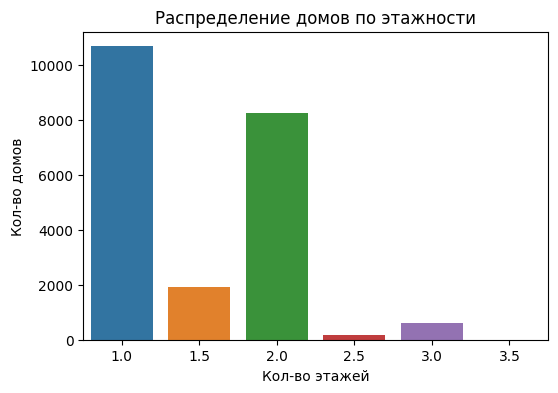

In [12]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['index'], y=data['floors'])
plt.title('Распределение домов по этажности')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во домов');

Из графика видно, что 1 и 2х этажные дома занимают большую долю.

### 2.2 Изучите распределение состояния домов

In [13]:
data = df['condition'].value_counts().reset_index()
data.head()

,index,condition
0,3,14031
1,4,5679
2,5,1701
3,2,172
4,1,30


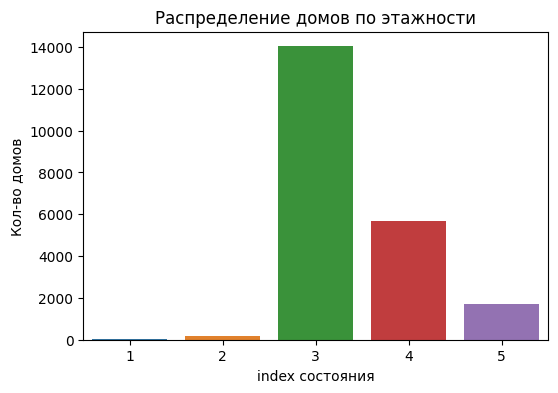

In [14]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['index'], y=data['condition'])
plt.title('Распределение домов по этажности')
plt.xlabel('index состояния')
plt.ylabel('Кол-во домов');

Из графика видим, что большинство домов имеют среднее состояние, домов в плохом состоянии очень маленькая доля.

### Условие 3: 3 задача<br>Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.<br>Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [24]:
plt.figure(figsize=(10, 8))

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

C:\Users\Сергей\AppData\Local\Temp\ipykernel_11040\593037180.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 1000x800 with 0 Axes>

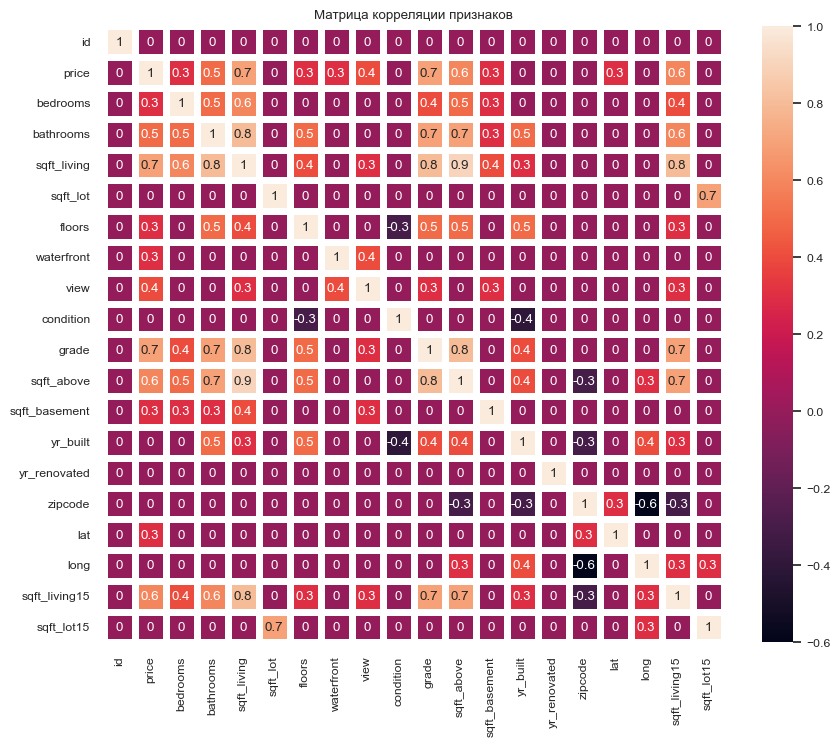

In [26]:
plt.figure(figsize=(10, 8))
sns.set(font_scale = 0.8)
sns.heatmap(corr_matrix, annot=True, linewidths= 5)
plt.title('Матрица корреляции признаков');

Из графика видно, что цена недвижимости зависит от площади недвижимости и соответственно от количества комнат, т.к. количество комнат взаимосвязано с количеством квадратных метров.

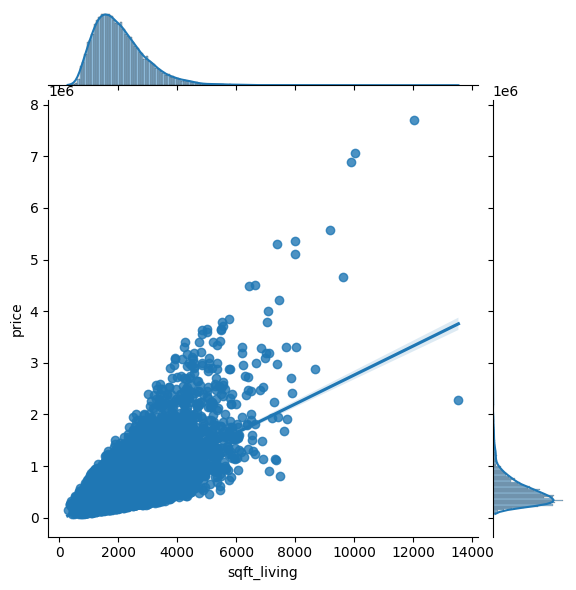

In [11]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');


Из графика видим, что цена на недвижимость сильно зависит от количества квадратных метров, а также и от других факторов влияющих на стоимость недвижимости.

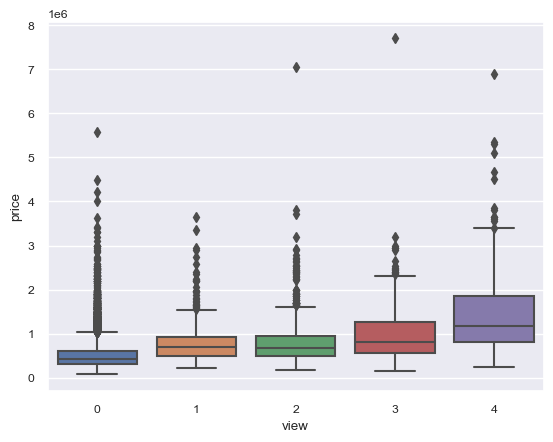

In [29]:
sns.boxplot(x=df['view'], y=df['price']);

Из графиков видим, что цена на недвижимость зависит от вида и недвижимость с индексом 4 является наиболее дорогой.

In [49]:
data = df['grade'].value_counts().reset_index()
data.head()

,index,grade
0,7,8981
1,8,6068
2,9,2615
3,6,2038
4,10,1134


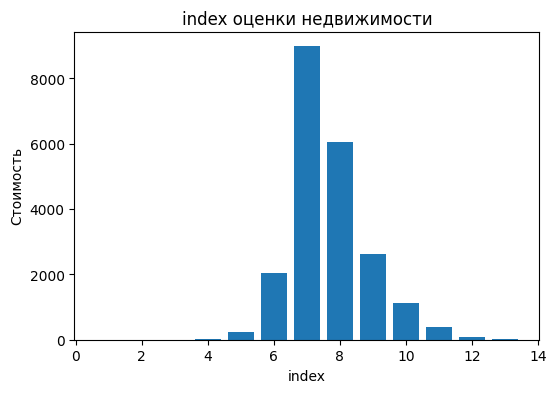

In [44]:
plt.figure(figsize=(6, 4))
plt.bar(data['index'], data['grade'])
plt.title('index оценки недвижимости')
plt.xlabel('index')
plt.ylabel('Стоимость');


Из графика видно, что индекс оценки недвижимости влияет на стоимость дома.

In [55]:
def form_dep_data(col1, col2, df):
    data = df.groupby(col1).agg({col2: 'mean'}).sort_index().reset_index()
    data[col1] = data[col1].apply(lambda val:str(val))
    return data

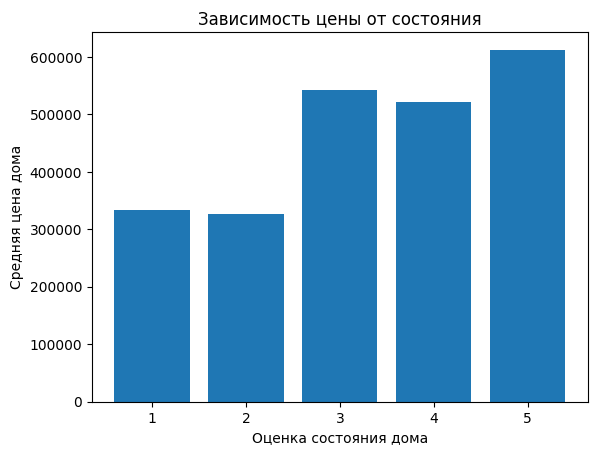

In [58]:
data = form_dep_data('condition', 'price', df)

plt.bar(data['condition'], data['price'])

plt.title("Зависимость цены от состояния")
plt.xlabel("Оценка состояния дома")
plt.ylabel("Средняя цена дома");

Из графика можно сделать вывод, что цена дома зависит от многих факторов в том числе и от состояния недвижимости.

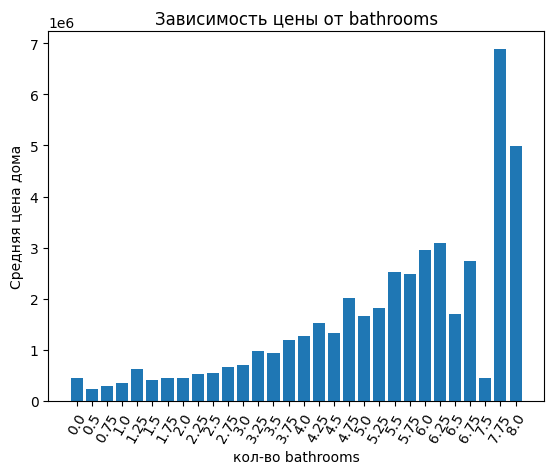

In [59]:
data = form_dep_data('bathrooms', 'price', df)

plt.bar(data['bathrooms'], data['price'])

plt.title("Зависимость цены от bathrooms")
plt.xlabel("кол-во bathrooms")
plt.ylabel("Средняя цена дома")
plt.xticks(rotation=60);

Из графика видно, что цена растет с ростом количества ванных комнат.